In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import floor,ceil

# Q1

### Helper functions

In [2]:
def get_img_intensity(img,x,y):
    assert len(img.shape)==2
    assert isinstance(x,int)
    assert isinstance(y,int)
    if x<0 or x>=img.shape[0] or y<0 or y>=img.shape[1]:
        return 0
    else:
        return img[x,y]

def get_bilinear_interpolation_intensity(img_source,xs,ys):
    assert len(img_source.shape)==2
    xsd,ysd = int(floor(xs)),int(floor(ys))
    a,b = xs - xsd, ys - ysd
    return (1-a)*(1-b)*get_img_intensity(img_source,xsd,ysd) + \
           (a)*(1-b)*get_img_intensity(img_source,xsd+1,ysd) + \
           (1-a)*(b)*get_img_intensity(img_source,xsd,ysd+1) + \
           (a)*(b)*get_img_intensity(img_source,xsd+1,ysd+1)


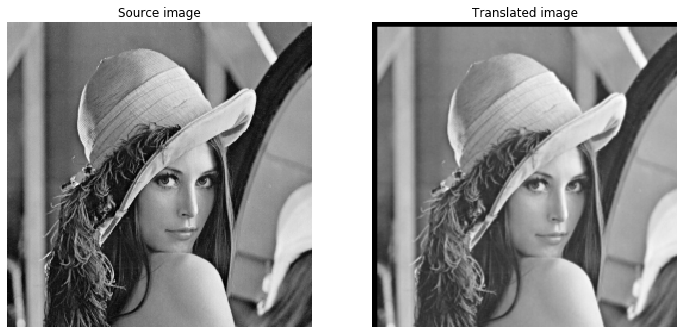

In [3]:
img_src = cv2.imread('lena_translate.png',0)
(l,w) = img_src.shape

tx,ty = 3.75,4.3
target_img = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        i_s,j_s = i-tx,j-ty
        target_img[i,j] = get_bilinear_interpolation_intensity(img_src,i_s,j_s)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Translated image")
ax1.imshow(img_src,cmap='gray')
ax2.imshow(target_img,cmap='gray')

# Q2

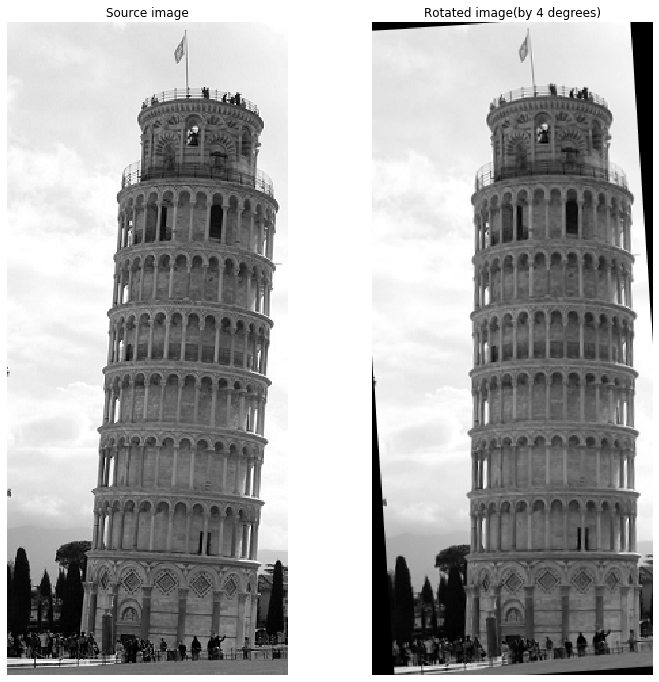

In [4]:
img_src2 = cv2.imread('pisa_rotate.png',0)
(l,w) = img_src2.shape
center = np.array([l/2,w/2])

theta = np.deg2rad(-4)
rotMat = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
rotMatInv = np.linalg.inv(rotMat)

target_img2 = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        [i_s,j_s] = center + rotMatInv @ np.array([i,j] - center)
        target_img2[i,j] = get_bilinear_interpolation_intensity(img_src2,i_s,j_s)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))
ax1.set_axis_off()
ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Rotated image(by 4 degrees)")
ax1.imshow(img_src2,cmap='gray')
ax2.imshow(target_img2,cmap='gray')

# Q3

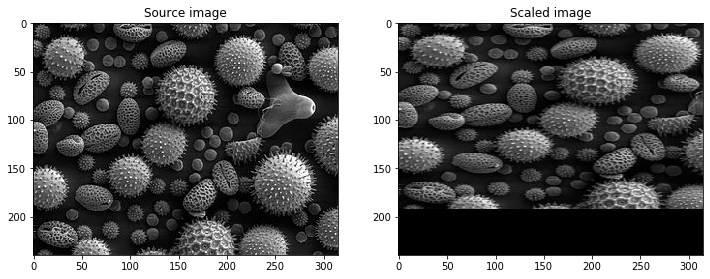

In [5]:
img_src3 = cv2.imread('cells_scale.png',0)
(l,w) = img_src3.shape

ScalMat = np.array([[0.8,0],[0,1.3]])
ScalMatInv = np.linalg.inv(ScalMat)

target_img3 = np.zeros((l,w))
for i in range(l):
    for j in range(w):
        [i_s,j_s] = ScalMatInv @ np.array([i,j])
        target_img3[i,j] = get_bilinear_interpolation_intensity(img_src3,i_s,j_s)

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,12))
# ax1.set_axis_off()
# ax2.set_axis_off()
ax1.set_title("Source image")
ax2.set_title("Scaled image")
ax1.imshow(img_src3,cmap='gray')
ax2.imshow(target_img3,cmap='gray')